# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import math

In [2]:
data = pd.read_table('data/mini.csv',sep=',', encoding='UTF-8')
data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [4]:
data.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


```
먼저 그럼 현재 서비스 상황을 확인할 필요가 있다.
현재 수강상태는 어떠한 편일까
```

In [5]:
# 최근 구독을 알기 위해서는 'payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값'을 사용해서 구독상태를 파악해보자
recent_pay = pd.DataFrame(data.user_id, data.payment_pattern)

In [6]:
recent_pay = recent_pay.reset_index()
recent_pay

,payment_pattern,user_id
0,5,b7586b82
1,6,682ca511
2,7,8c948022
3,0,b919c29d
4,0,b919c29d
...,...,...
9995,1,a0a60abb
9996,7,8c948022
9997,6,682ca511
9998,0,b919c29d


In [7]:
recent_pay['last']=recent_pay.payment_pattern.isin([1,3,5,7])

In [8]:
recent_pay

,payment_pattern,user_id,last
0,5,b7586b82,True
1,6,682ca511,False
2,7,8c948022,True
3,0,b919c29d,False
4,0,b919c29d,False
...,...,...,...
9995,1,a0a60abb,True
9996,7,8c948022,True
9997,6,682ca511,False
9998,0,b919c29d,False


In [9]:
last_pay = recent_pay['last'].value_counts()
last_pay

last
True     5037
False    4963
Name: count, dtype: int64

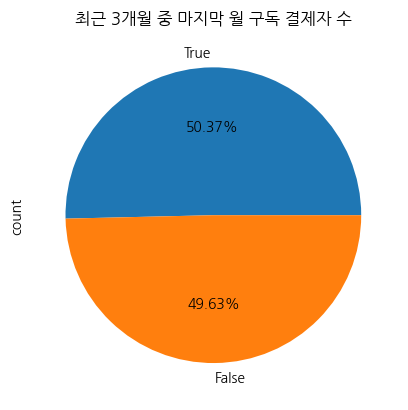

In [10]:
last_pay.plot.pie(autopct='%.2f%%')
plt.title('최근 3개월 중 마지막 월 구독 결제자 수')
plt.show()

```
해당 데이터를 통해 마지막 월 기준 구독 결제자 수는 전체 사용자 중 약 50%로 확인되었다.
해당 데이터를 통해서는 현재 구매 현황에 대해서만 확인 가능하며 이후에 대해서는 어렵다.

다만, 최근 이용했던 사람이 이후 구독을 연장할 가능성이 높다고 추정된다.
이에 최근 구독 구매자들을 통해 왜 구매를 했는지 이유를 확인할 필요가 있어 해당 구매자들과 관련된 요인들을 분석을 진행하고자 한다.
```

```
먼저, 최근 구독 결제를 진행한 이용자들은 어떤 구독 요금을 결제했는지 확인해 보고자 한다.
```

In [11]:
recent_pay['subscription_type'] = data['subscription_type']
recent_pay

,payment_pattern,user_id,last,subscription_type
0,5,b7586b82,True,Basic
1,6,682ca511,False,Basic
2,7,8c948022,True,Premium
3,0,b919c29d,False,Basic
4,0,b919c29d,False,Basic
...,...,...,...,...
9995,1,a0a60abb,True,Premium
9996,7,8c948022,True,Basic
9997,6,682ca511,False,Basic
9998,0,b919c29d,False,Basic


In [12]:
grouping = data.groupby(['payment_pattern', 'subscription_type'])
grouping

In [13]:
cohort_data = grouping['user_id'].apply(pd.Series.nunique)
cohort_data = pd.DataFrame(cohort_data)
cohort_data.head(6)

user_id
payment_pattern subscription_type         
0               Basic                  763
                Premium                512
1               Basic                  722
                Premium                563
2               Basic                  697
                Premium                509

In [14]:
cohort_data = cohort_data.reset_index()
cohort_data.head()

,payment_pattern,subscription_type,user_id
0,0,Basic,763
1,0,Premium,512
2,1,Basic,722
3,1,Premium,563
4,2,Basic,697


In [15]:
cohort_counts = cohort_data.pivot(index="payment_pattern",
                                  columns="subscription_type",
                                  values="user_id")
cohort_counts

subscription_type,Basic,Premium
payment_pattern,,
0,763,512
1,722,563
2,697,509
3,714,516
4,764,450
5,772,466
6,766,502
7,781,503


In [16]:
retention = cohort_counts

In [17]:
retention.loc['총합', :] = retention.loc[0:7, :].sum(axis=0)
retention

subscription_type,Basic,Premium
payment_pattern,,
0,763.0,512.0
1,722.0,563.0
2,697.0,509.0
3,714.0,516.0
4,764.0,450.0
5,772.0,466.0
6,766.0,502.0
7,781.0,503.0
총합,5979.0,4021.0


In [18]:
retention_size = retention.Basic + retention.Premium
retention_size

payment_pattern
0      1275.0
1      1285.0
2      1206.0
3      1230.0
4      1214.0
5      1238.0
6      1268.0
7      1284.0
총합    10000.0
dtype: float64

In [19]:
retention = cohort_counts.divide(retention_size, axis=0)
retention.head()

subscription_type,Basic,Premium
payment_pattern,,
0,0.598431,0.401569
1,0.561868,0.438132
2,0.577944,0.422056
3,0.580488,0.419512
4,0.629325,0.370675


In [20]:
retention.round(3)*100

subscription_type,Basic,Premium
payment_pattern,,
0,59.8,40.2
1,56.2,43.8
2,57.8,42.2
3,58.0,42.0
4,62.9,37.1
5,62.4,37.6
6,60.4,39.6
7,60.8,39.2
총합,59.8,40.2


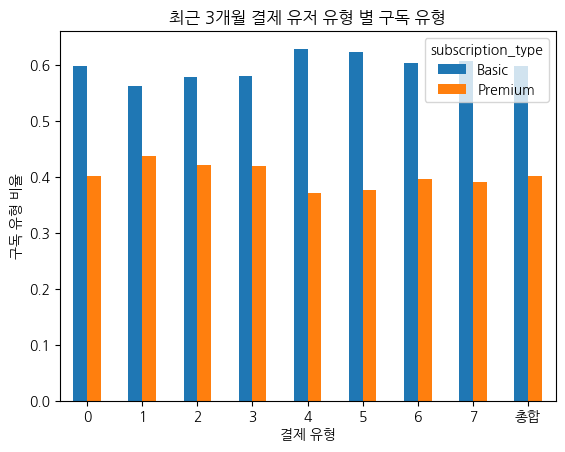

In [21]:
retention.plot.bar(rot=0)
plt.title("최근 3개월 결제 유저 유형 별 구독 유형")
plt.xlabel("결제 유형")
plt.ylabel("구독 유형 비율")
plt.show()

```
그래프를 통해 구독 유형에 대해 확인하였을 때,
최근 3개월 결제 중 첫번째 월에 결제한 이용자들(4,5,6,7)의 Basic 구독 유형이 높은 편으로 확인되나
크게 변화하거나 전체 총합 과의 비율과도 큰 차이는 확인되지 않는다.
```

```
현재 상황 : 
전체 이용자 중 절반 가량이 현재 서비스를 이용 중이며, Basic 구독 요금제를 이용하고 있는 것으로 확인된다.
해당 자료를 통해서는 전반적인 현재 상황만 확인할 뿐 어떠한 요인이 구독 연장을 할지는 예측하기 어렵다.

```

```
여기서 중요하게 생각해야할 결제 유형을 꼽자면 5번 유형의 결제자를 중요하게 볼 필요가 있다.
해당 고객은 한번 이탈을 경험했으나 이후 다시 재구매를 했기에 재구매를 '어떤 요인'에 의해 하게 되었는지 살펴볼 필요가 있다.
```

In [22]:
pay5 = data.set_index(data.payment_pattern)

In [23]:
pay5=pay5.loc[5]

In [24]:
pay5

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
payment_pattern,,,,,,,,,,,,,,,
5,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
5,5847745f,16,4,15.983985,3.781315,5,13,70.924567,6,4,Medium,Premium,1,5,0
5,e5ab9eae,20,23,17.672267,173.153471,22,7,73.404192,4,4,Medium,Basic,1,5,1
5,33319bcd,1,14,10.247550,3.882771,14,11,72.988718,3,2,Low,Basic,3,5,1
5,7572ac67,4,29,15.279057,18.663997,21,11,72.623031,1,5,High,Basic,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,de2754f7,21,22,16.108321,262.126094,8,9,70.677943,5,5,Low,Basic,1,5,1
5,4ddde6d3,2,24,11.412968,28.240429,11,5,74.208750,2,3,High,Basic,2,5,1
5,bea1533c,3,16,14.852442,19.765124,19,11,58.643467,2,5,Medium,Premium,0,5,1


`먼저 5번 유형 결제자가 서비스를 '얼마나' 이용했는지 알아보고자 한다.`

In [25]:
pay5_use=pay5[['user_id','average_login_time', 'average_time_per_learning_session']]
pay5_use

,user_id,average_login_time,average_time_per_learning_session
payment_pattern,,,
5,b919c29d,14.946163,8.427187
5,5847745f,15.983985,3.781315
5,e5ab9eae,17.672267,173.153471
5,33319bcd,10.247550,3.882771
5,7572ac67,15.279057,18.663997
...,...,...,...
5,de2754f7,16.108321,262.126094
5,4ddde6d3,11.412968,28.240429
5,bea1533c,14.852442,19.765124


In [26]:
pay5_use=pay5_use.set_index(pay5_use.user_id)
pay5_use

,user_id,average_login_time,average_time_per_learning_session
user_id,,,
b919c29d,b919c29d,14.946163,8.427187
5847745f,5847745f,15.983985,3.781315
e5ab9eae,e5ab9eae,17.672267,173.153471
33319bcd,33319bcd,10.247550,3.882771
7572ac67,7572ac67,15.279057,18.663997
...,...,...,...
de2754f7,de2754f7,16.108321,262.126094
4ddde6d3,4ddde6d3,11.412968,28.240429
bea1533c,bea1533c,14.852442,19.765124


In [27]:
pay5_use['average_login_time']=pay5_use['average_login_time'].astype(int)
pay5_use

,user_id,average_login_time,average_time_per_learning_session
user_id,,,
b919c29d,b919c29d,14,8.427187
5847745f,5847745f,15,3.781315
e5ab9eae,e5ab9eae,17,173.153471
33319bcd,33319bcd,10,3.882771
7572ac67,7572ac67,15,18.663997
...,...,...,...
de2754f7,de2754f7,16,262.126094
4ddde6d3,4ddde6d3,11,28.240429
bea1533c,bea1533c,14,19.765124


In [28]:
grouping2 = pay5_use.groupby(['average_login_time']).count()
grouping2 = grouping2.drop('average_time_per_learning_session', axis=1)
grouping2

,user_id
average_login_time,
7,8
8,14
9,30
10,52
11,72
12,122
13,156
14,179
15,174


In [29]:
pay_all = data[['user_id', 'payment_pattern', 'average_login_time']]
pay_all

,user_id,payment_pattern,average_login_time
0,b919c29d,5,14.946163
1,a0a60abb,6,18.453224
2,b9f171ae,7,16.195228
3,5dc0ba8b,0,17.628656
4,65c83654,0,21.390656
...,...,...,...
9995,ae6b76bc,1,14.727623
9996,24588752,7,19.374054
9997,e4622a54,6,18.240978
9998,e07fbad9,0,18.783800


In [30]:
pay_all['average_login_time']=pay_all['average_login_time'].astype(int)
pay_all

C:\Users\User\AppData\Local\Temp\ipykernel_18348\2365438137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pay_all['average_login_time']=pay_all['average_login_time'].astype(int)


,user_id,payment_pattern,average_login_time
0,b919c29d,5,14
1,a0a60abb,6,18
2,b9f171ae,7,16
3,5dc0ba8b,0,17
4,65c83654,0,21
...,...,...,...
9995,ae6b76bc,1,14
9996,24588752,7,19
9997,e4622a54,6,18
9998,e07fbad9,0,18


In [31]:
group_all = pay_all.groupby(['payment_pattern','average_login_time']).count()
group_all

user_id
payment_pattern average_login_time         
0               3                         1
                5                         1
                6                         3
                7                        10
                8                        14
...                                     ...
7               21                       11
                22                        6
                23                        1
                24                        1
                26                        2

[168 rows x 1 columns]

In [32]:
group_all=group_all.reset_index()
group_all

,payment_pattern,average_login_time,user_id
0,0,3,1
1,0,5,1
2,0,6,3
3,0,7,10
4,0,8,14
...,...,...,...
163,7,21,11
164,7,22,6
165,7,23,1
166,7,24,1


In [33]:
cohort_counts2 = group_all.pivot(index="payment_pattern",
                                  columns="average_login_time",
                                  values="user_id")
cohort_counts2

average_login_time,2,3,4,5,6,7,8,9,10,11,...,17,18,19,20,21,22,23,24,25,26
payment_pattern,,,,,,,,,,,,,,,,,,,,,
0,NaN,1.0,NaN,1.0,3.0,10.0,14.0,38.0,51.0,88.0,...,115.0,85.0,58.0,29.0,9.0,5.0,2.0,NaN,NaN,1.0
1,NaN,1.0,3.0,NaN,5.0,8.0,18.0,28.0,54.0,79.0,...,105.0,85.0,67.0,41.0,17.0,5.0,7.0,3.0,NaN,NaN
2,NaN,1.0,1.0,2.0,3.0,6.0,16.0,22.0,53.0,80.0,...,110.0,84.0,52.0,21.0,12.0,9.0,4.0,1.0,1.0,NaN
3,1.0,NaN,1.0,1.0,3.0,14.0,13.0,26.0,67.0,93.0,...,96.0,91.0,53.0,26.0,20.0,5.0,2.0,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,4.0,8.0,17.0,40.0,45.0,84.0,...,125.0,74.0,60.0,31.0,16.0,8.0,1.0,2.0,1.0,NaN
5,NaN,NaN,NaN,NaN,NaN,8.0,14.0,30.0,52.0,72.0,...,99.0,91.0,47.0,29.0,19.0,8.0,4.0,2.0,1.0,NaN
6,NaN,NaN,NaN,NaN,2.0,10.0,17.0,35.0,53.0,81.0,...,118.0,83.0,56.0,29.0,20.0,9.0,3.0,2.0,2.0,NaN
7,NaN,1.0,NaN,1.0,5.0,4.0,17.0,27.0,54.0,71.0,...,132.0,96.0,52.0,30.0,11.0,6.0,1.0,1.0,NaN,2.0


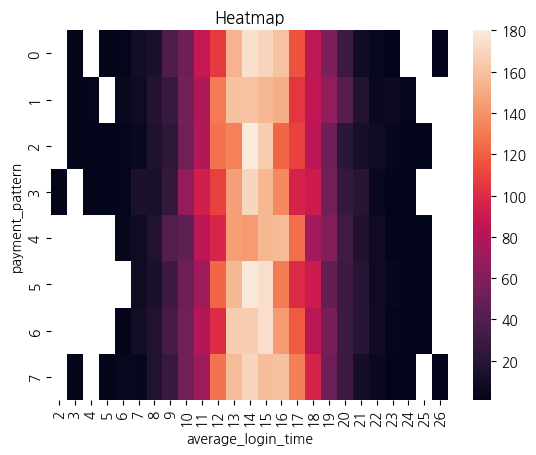

In [34]:
sns.heatmap(cohort_counts2)
plt.title("Heatmap")
plt.show()

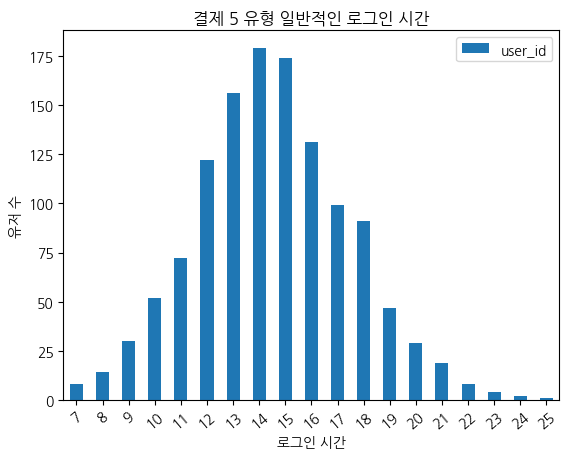

In [35]:
grouping2.plot(kind='bar', rot=40)
plt.title("결제 5 유형 일반적인 로그인 시간")
plt.xlabel("로그인 시간")
plt.ylabel("유저 수")
plt.show()

```
전체 평균 로그인 시간과 5번 결제 유형을 비교해 보았을 때 다른 결제 유형과 달리 14시,15시에 접속 시간이 높은 것으로 확인되었다.
아울러 다른 결제 유형과 달리 새벽시간대 이용 비율이 적은 것으로 확인되기에, 평소 활동 시간에 해당 교육 서비스를 이용하는 것으로 파악된다.
```

In [85]:
pay5_learning = data[['user_id','payment_pattern', 'average_time_per_learning_session']]
pay5_learning = pay5_learning.set_index('payment_pattern')
pay5_learning 

,user_id,average_time_per_learning_session
payment_pattern,,
5,b919c29d,8.427187
6,a0a60abb,72.646087
7,b9f171ae,21.774492
0,5dc0ba8b,42.659066
0,65c83654,30.744287
...,...,...
1,ae6b76bc,84.053558
7,24588752,45.464833
6,e4622a54,127.302411


In [94]:
pay5_learning = pay5_learning.loc[5]
pay5_learning.sort_values('average_time_per_learning_session')

,user_id,average_time_per_learning_session
payment_pattern,,
5,e6f2168e,0
5,a9659950,0
5,d53a3d25,0
5,7e138ba3,0
5,e71ed4d0,0
...,...,...
5,ee347c2a,365
5,a39744b3,406
5,d3829a7e,434


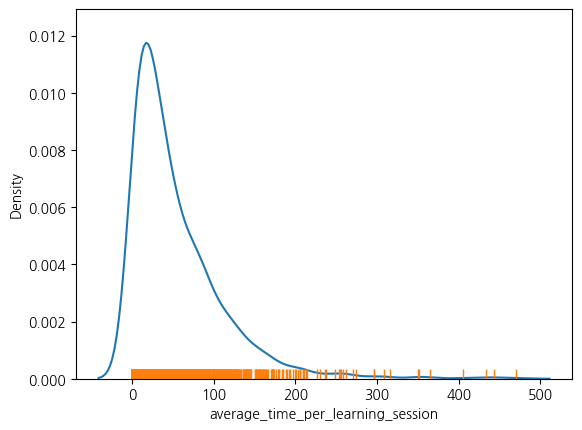

In [96]:
sns.kdeplot(data=pay5_learning, x="average_time_per_learning_session")
sns.rugplot(data=pay5_learning, x="average_time_per_learning_session")
plt.show()

```
또한 위의 그래프를 통해 0~100분 정도 평균적으로 서비스를 이용하는 것을 통해 5번 유형 결제자들은 규칙적인 생활을 하는 무직 또는 저녁 이후로 업무 및 활동을 하는 것으로 추측할 수 있다.

다만, 해당 자료를 통해서는 평균적인 이용 시간에 대해서만 확인이 가능하며 평일 및 주말 이용에 대해서는 확인할 수 없다. 그렇기에 주말에 서비스를 이용하는 직장인의 경우가 있을 수 있다.

이에 추가적으로 주간 평균 접속 일자에 대한 데이터를 요청하여 학생 및 무직일지, 직장인일지 유추해 보는 것도 좋다고 생각한다. 
```